Import all libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# code below shows an example image and it's dimension

# img_array = cv2.imread("EmotionDataset/train/angry/Training_10118481.jpg")
# img_array.shape
# plt.imshow(img_array)

In [13]:
DataDirectory = "EmotionDataset - Copy/train/" # Location of training data folder

In [14]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"] # The 7 different training classes

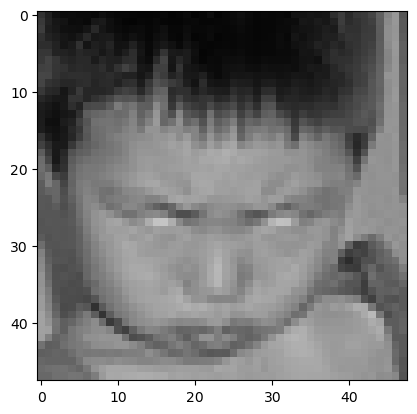

In [15]:
# Code for reading all the images by specifying their paths

for category in Classes:
    path = os.path.join(DataDirectory, category)
    # the for loop below reads the nth image of each class for every iteration
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 
        # uncomment both the code below to display all the images being read
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

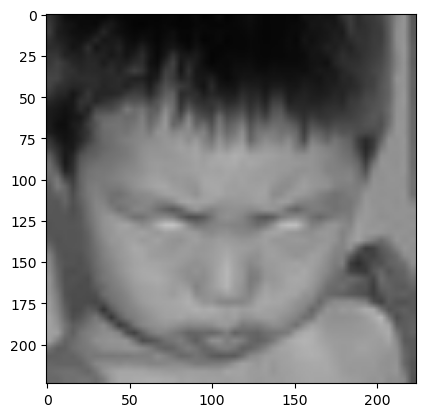

In [16]:
# Change the size of image from 48x48 to 224x224 as the model we used was trained on 224x224 images
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
new_array.shape

(224, 224, 3)

In [18]:
# read all the images and convert them to an array

training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

print(len(training_data))

13192


In [8]:
print(len(training_data))

13192


In [19]:
random.shuffle(training_data)

In [20]:
# store features in x and labels in y

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3) # converts list to 4D array
y = np.array(y)

In [21]:
x.shape # this gives 4D output

(13192, 224, 224, 3)

In [22]:
# normalize the data

x = x/255.0

In [23]:
model = tf.keras.applications.MobileNetV2() # Pre trained model for 1000 classes

In [24]:
model.summary() # as you can see inputs are 224x224

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [25]:
# transfer learning

base_input = model.layers[0].input
base_output = model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
final_output = layers.Dense(128)(base_output) # adding new layer after output of global pooling layer
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(final_output) # reduce 128 by half
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(7, activation = 'softmax')(final_output) #reduce 64 to 7 as we have 7 classes

In [28]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [31]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [32]:
new_model.fit(x, y, epochs = 30)

In [33]:
new_model.save('30epoch_MobileNetV2.h5')

In [34]:
new_model = tf.keras.models.load_model('30epoch_MobileNetV2.h5')

In [35]:
frame = cv2.imread("happy man.jpg")

In [36]:
frame.shape

(408, 612, 3)

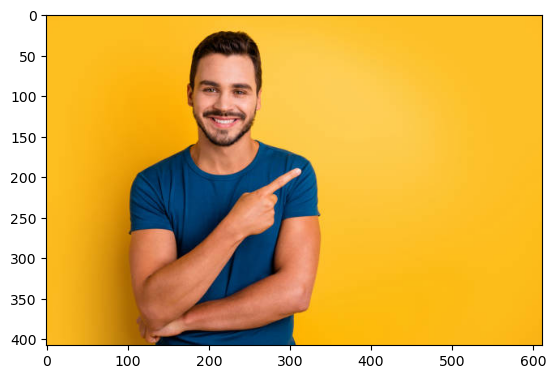

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [38]:
# face detection algorithm

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape

(408, 612)

In [41]:
faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 , 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

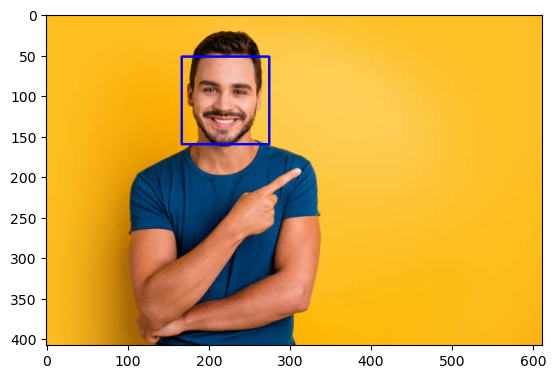

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

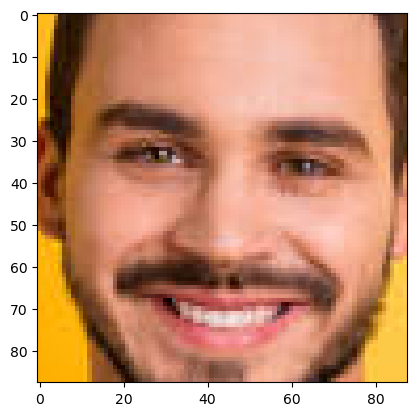

In [43]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [44]:
final_image = cv2.resize(face_roi, (224,224)) # resizing the face image to 224x224
final_image = np.expand_dims(final_image, axis = 0) # adding 4D
final_image = final_image/255.0 #normalizing

In [45]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [46]:
Predictions[0]

array([1.0489188e-05, 4.3946650e-07, 2.9948505e-03, 4.5496311e-02,
       9.4306517e-01, 8.3328714e-06, 8.4244991e-03], dtype=float32)

In [47]:
np.argmax(Predictions)

4

Real Time Detection Video Feed

In [48]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_DUPLEX

# set the rectangle background to white
# rectangle_bgr = (255, 255, 255)
# # make a black image
# img = np.zeros((500,500))
# # set some text
# text = "Text"
# # get the width and height of the text box
# (text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]
# # set the text start position
# text_offset_x = 10
# text_offset_y = img.shape[0] - 25
# # make the coordinates of the box with a small padding of 2 pixels
# box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
# cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
# cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0, 0, 0), thickness = 1)

cap = cv2.VideoCapture(1)
# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 , 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(face_roi, (224, 224)) # resizing the face image to 224x224
    final_image = np.expand_dims(final_image, axis = 0) # adding 4D
    final_image = final_image/255.0 #normalizing
    
    font = cv2.FONT_HERSHEY_DUPLEX
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_DUPLEX
    
    if(np.argmax(Predictions) == 0):
        status = "Angry"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif(np.argmax(Predictions) == 1):
        status = "Disgust"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
                    
    elif(np.argmax(Predictions) == 2):
        status = "Fear"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif(np.argmax(Predictions) == 3):
        status = "Happy"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
                    
    elif(np.argmax(Predictions) == 4):
        status = "Neutral"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
                    
    elif(np.argmax(Predictions) == 5):
        status = "Sad"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
                    
    elif(np.argmax(Predictions) == 6):
        status = "Surprise"
        x1, y1, w1, h1 = 0, 0, 175, 175
        #black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
                    
    cv2.imshow('Emotion Detector', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
            
cap.release()
cv2.destroyAllWIndows()

1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 53ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected


1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 51ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 54ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 59ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [===============

KeyboardInterrupt: 